In [3]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint, gauss
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [4]:
resources = pd.read_csv('../Data/heterogeneous_resources.csv', index_col=0)
resources

,PFlops Mean,Pflops STD
PSC Bridges,1.300,0.0834
SDSC Comet,2.760,0.1780
TACC Frontera,23.516,1.5170
TACC Stampede2,10.680,0.6890


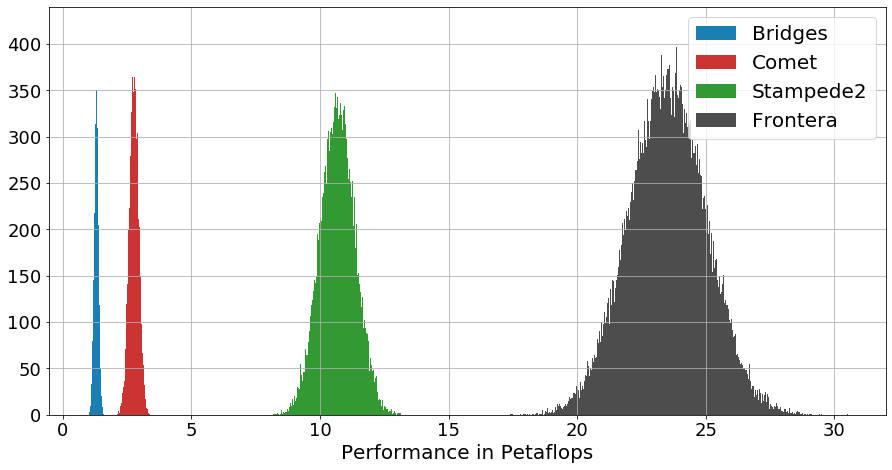

In [5]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,7.5)
_ = axis.hist([gauss(resources.loc['PSC Bridges']['PFlops Mean'], resources.loc['PSC Bridges']['Pflops STD']) for _ in range(100000)], bins=1000, color=tableau20(0), label='Bridges')# _ = axis.set_yscale('symlog')
_ = axis.hist([gauss(resources.loc['SDSC Comet']['PFlops Mean'], resources.loc['SDSC Comet']['Pflops STD']) for _ in range(100000)], bins=1000, color=tableau20(6), label='Comet')# _ = axis.set_yscale('symlog')
_ = axis.hist([gauss(resources.loc['TACC Stampede2']['PFlops Mean'], resources.loc['TACC Stampede2']['Pflops STD']) for _ in range(100000)], bins=1000, color=tableau20(4), label='Stampede2')# _ = axis.set_yscale('symlog')
_ = axis.hist([gauss(resources.loc['TACC Frontera']['PFlops Mean'], resources.loc['TACC Frontera']['Pflops STD']) for _ in range(100000)], bins=1000, color=tableau20(18), label='Frontera')# _ = axis.set_yscale('symlog')
_ = axis.set_xlabel('Performance in Petaflops',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.legend(fontsize=20, loc='upper right')
#_ = axis.set_title('Heterogeneous resources performance histogram', fontsize=22)
#_ = fig.savefig('../Figures/hetero_res.pdf', bbox_inches='tight')

# Homogeneous resources - Homogeneous workflows


In [6]:
HomogeResources_StHomogeCampaigns = pd.read_csv('../Data/HomogeResources_StHomogeCampaigns.csv')

HomogeResources_StHomogeCampaigns = HomogeResources_StHomogeCampaigns.groupby(by=['planner','size'])
HomogeResources_StHomogeCampaigns_makespan_means = HomogeResources_StHomogeCampaigns.mean()
HomogeResources_StHomogeCampaigns_makespan_stds = HomogeResources_StHomogeCampaigns.std()

In [7]:
#print('Means')
#print(HomogeResources_StHomogeCampaigns_makespan_means/1000)
#print('STD')
#print(HomogeResources_StHomogeCampaigns_makespan_stds/1000)

In [8]:
ideal = list()
for res in [4, 8, 16, 32, 64, 128]:
    ideal.append( ((75000 * 1024) / res) )

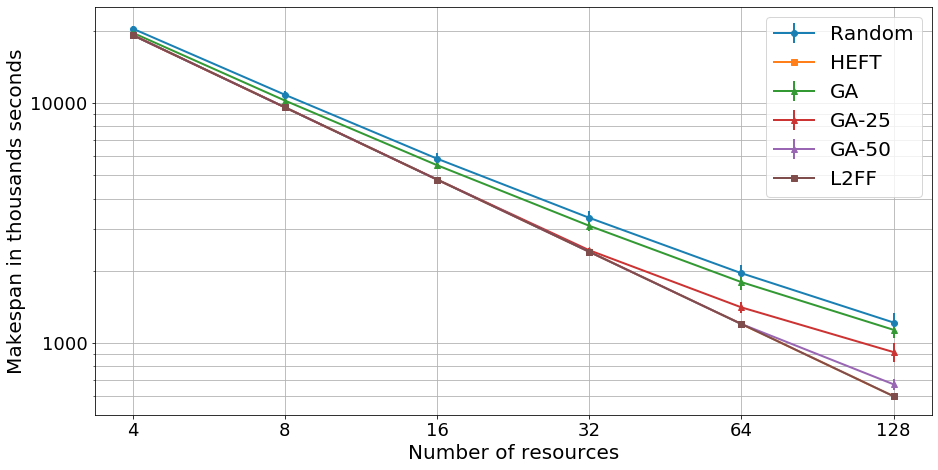

In [9]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF').index,HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [6]:
HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values

array([20430600., 10833825.,  5865075.,  3325050.,  1953975.,  1217250.])

In [7]:
HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values

array([19200000.,  9600000.,  4800000.,  2400000.,  1200000.,   600000.])

In [8]:
HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values

array([19635000., 10245750.,  5508750.,  3080250.,  1794000.,  1134750.])

In [9]:
HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values

array([19200000.,  9600000.,  4800000.,  2436000.,  1407750.,   916500.])

In [10]:
HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values

array([19200000.,  9600000.,  4800000.,  2400000.,  1200000.,   672750.])

In [11]:
HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values

array([19200000.,  9600000.,  4800000.,  2400000.,  1200000.,   600000.])

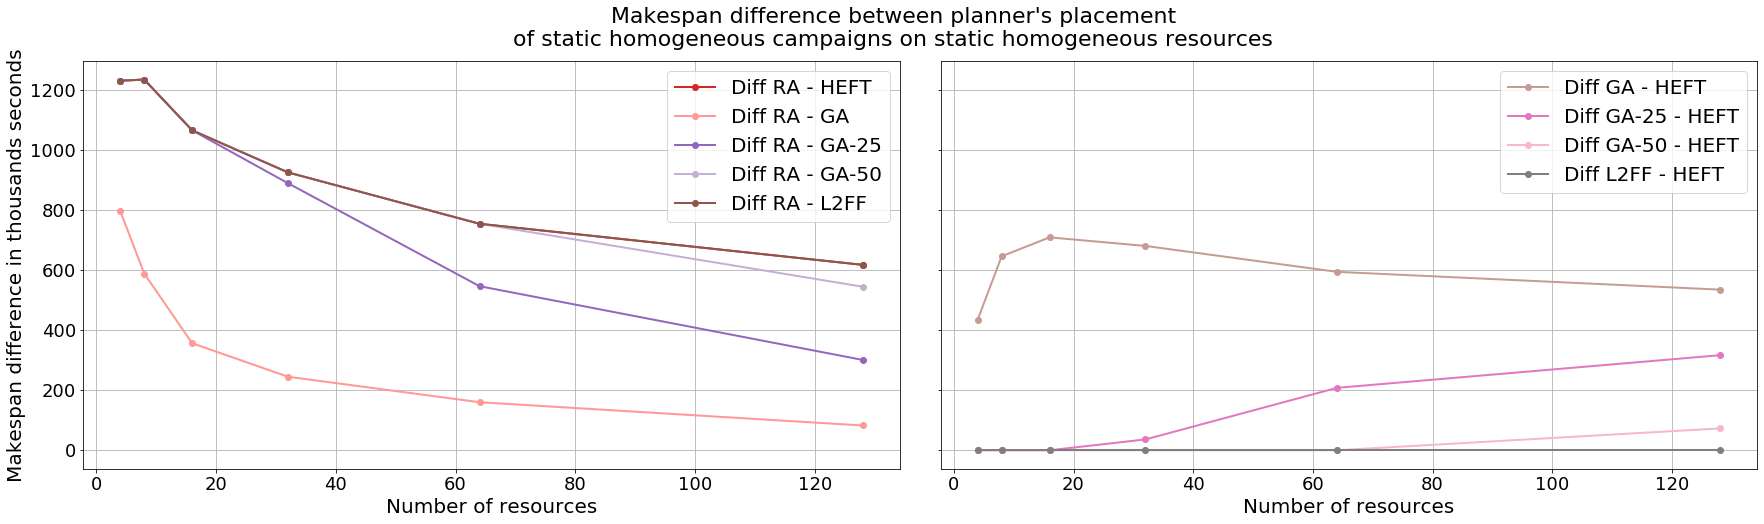

In [10]:
DiffStHomoCamp_4StHomoResHE = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResGA25 = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values)
DiffStHomoCamp_4StHomoResGA50 = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values)
DiffStHomoCamp_4StHomoResL2 = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values)

DiffStHomoCamp_4StHomoResHEGA = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA25 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA50 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEL2 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)

fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis.set_yscale('symlog')
_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of resources',fontsize=20)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on')
_ = axis[0].legend(fontsize=20)

_ = axis[1].set_xlabel('Number of resources',fontsize=20)
_ = axis[1].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on')
_ = axis[1].legend(fontsize=20)
_ = fig.suptitle("Makespan difference between planner's placement\nof static homogeneous campaigns on static homogeneous resources", fontsize=22)
#fig.savefig('StHomoResources_StHomoCampaigns_diff.png',bbox_inches='tight')

In [12]:
test1 = DiffStHomoCamp_4StHomoResGA / HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values
test2 = DiffStHomoCamp_4StHomoResGA25 / HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values
test3 = DiffStHomoCamp_4StHomoResGA50 / HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values

In [13]:
test1

array([0.03894159, 0.05428138, 0.0607537 , 0.07362295, 0.08187157,
       0.06777572])

In [14]:
test2

array([0.06023318, 0.11388637, 0.18159614, 0.26737944, 0.27954554,
       0.24707332])

In [15]:
test3

array([0.06023318, 0.11388637, 0.18159614, 0.27820634, 0.38586727,
       0.44731978])

In [19]:
DiffStHomoCamp_4StHomoResHEGA = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA25 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA50 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values)

In [22]:
print(DiffStHomoCamp_4StHomoResHEGA50 / HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values)

[0.      0.      0.      0.      0.      0.12125]


In [ ]:
work_per_resource = pd.read_csv('../Data/workflows_per_resource.csv')
work_per_resource = work_per_resource.groupby(by=['planner','size'])
work_per_resource_mean = work_per_resource.mean()
work_per_resource_std = work_per_resource.std()

In [ ]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(work_per_resource_mean.xs('RAND').index, work_per_resource_mean.xs('RAND')['freqs'].values, work_per_resource_std.xs('RAND')['freqs'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('GA').index, work_per_resource_mean.xs('GA')['freqs'].values, work_per_resource_std.xs('GA')['freqs'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('HEFT').index, work_per_resource_mean.xs('HEFT')['freqs'].values, color=reds(150),marker='s',label='HEFT',linewidth=2)
_ = axis.errorbar([4, 8, 16, 32, 64, 128], [256, 128, 64, 32, 16, 8], linestyle='--',label='Ideal', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log', basey=2)
_ = axis.set_ylabel('Maximum number of workflows',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Maximum number of workflows per resource\n of static homogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
# _ = fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns_num.pdf',bbox_inches='tight')

# Homogeneous resources - Heterogeneous workflows 

In [ ]:
HomogeResources_StHeteroCampaigns = pd.read_csv('../Data/HomogeResources_StHeteroCampaigns.csv')

HomogeResources_StHeteroCampaigns = HomogeResources_StHeteroCampaigns.groupby(by=['planner','size'])
HomogeResources_StHeteroCampaigns_makespan_means = HomogeResources_StHeteroCampaigns.mean()
HomogeResources_StHeteroCampaigns_makespan_stds = HomogeResources_StHeteroCampaigns.std()

In [ ]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,HomogeResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values, color=tableau20(10),marker='^',label='L2FF',linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog', basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/HomogeResources_StHeteroCampaigns.png',bbox_inches='tight')

# Heterogeneous resources - Homogeneous workflows 

The following figures compare the makespan of a homogeneous campaign. As we can see from the following figure....

In [ ]:
HeteroResources_StHomogeCampaigns = pd.read_csv('../Data/HeteroResources_StHomogeCampaigns.csv')

In [ ]:
HeteroResources_StHomogeCampaigns = HeteroResources_StHomogeCampaigns.groupby(by=['planner','size'])
HeteroResources_StHomogeCampaigns_makespan_means = HeteroResources_StHomogeCampaigns.mean()
HeteroResources_StHomogeCampaigns_makespan_stds = HeteroResources_StHomogeCampaigns.std()

In [ ]:
#print(HeteroResources_StHomogeCampaigns_makespan_means/1000)

In [ ]:
#pprint(HeteroResources_StHomogeCampaigns_makespan_stds/1000)

In [ ]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-25').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-50').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('L2FF').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values, color=tableau20(10),marker='^',label='L2FF',linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroResources_StHomoCampaigns.png',bbox_inches='tight')

In [ ]:
#DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
#_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=set1(3))
#_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=set1(4))
#_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=set1(6))
#_ = axis.set_yscale('log')
#_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis.set_xlabel('Number of resources',fontsize=20)
#_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis.grid('on', which='both')
#_ = axis.legend(fontsize=20)
#_ = axis.set_title("Makespan difference between planner's placement\nof static homogeneous campaigns on static heterogeneous resources", fontsize=22)
#fig.savefig('StHeteroResources_StHomoCampaigns_diff.png',bbox_inches='tight')

# Heterogeneous Campaign

The following figures compare the makespan of a heterogeneous campaign. The campaign is the same as in Experiment 1. As we can see from the following figure, HEFT provides the best makespan, while the random planner has the worst makespan. What is interesting is that the random planner's makespan increases significantly for 64 and 128 resources. The random planner's makespan is not only affected the number of workflows per resource, but also by which workflows are placed in each resource. 

In [ ]:
HeteroResources_StHeteroCampaigns = pd.read_csv('../Data/HeteroResources_StHeteroCampaigns.csv')

HeteroResources_StHeteroCampaigns = HeteroResources_StHeteroCampaigns.groupby(by=['planner','size'])
HeteroResources_StHeteroCampaigns_makespan_means = HeteroResources_StHeteroCampaigns.mean()
HeteroResources_StHeteroCampaigns_makespan_stds = HeteroResources_StHeteroCampaigns.std()

In [ ]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_means/1000)

In [ ]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_stds/1000)

In [ ]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values, color=tableau20(10),marker='^',label='L2FF',linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHeteroResources_StHeteroCampaigns.pdf',bbox_inches='tight')
#fig.savefig('StHeteroResources_StHeteroCampaigns.pdf',bbox_inches='tight')

In [ ]:
#DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
#_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=set1(3))
#_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=set1(4))
#_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=set1(6))
#_ = axis.set_yscale('log')
#_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis.set_xlabel('Number of resoruces',fontsize=20)
#_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis.grid('on', which='both')
#_ = axis.legend(fontsize=20)
#_ = axis.set_title("Makespan difference between planner's placement\nof static heterogeneous campaigns on static heterogeneous resources", fontsize=22)
#fig.savefig('StHeteroResources_StHeteroCampaigns_diff.png',bbox_inches='tight')
#fig.savefig('StHeteroResources_StHeteroCampaigns_diff.pdf',bbox_inches='tight')

In [ ]:
SpHeteroResources_StHeteroCampaigns = pd.read_csv('../Data/SpHeteroResources_StHeteroCampaigns.csv')

SpHeteroResources_StHeteroCampaigns = SpHeteroResources_StHeteroCampaigns.groupby(by=['planner','size'])
SpHeteroResources_StHeteroCampaigns_makespan_means = SpHeteroResources_StHeteroCampaigns.mean()
SpHeteroResources_StHeteroCampaigns_makespan_stds = SpHeteroResources_StHeteroCampaigns.std()

In [ ]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(SpHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index, SpHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(SpHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, SpHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values,SpHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(SpHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-75').index, SpHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-75')['makespan'].values,SpHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-75')['makespan'].values, color=tab20(5),marker='^',label='GA-75',linewidth=2)

_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroResources_StHeteroCampaigns.png',bbox_inches='tight')
#fig.savefig('StHeteroResources_StHeteroCampaigns.pdf',bbox_inches='tight')